<a href="https://colab.research.google.com/github/adheeb4/MLNN-Project-Group-40/blob/main/Group_Project_Group_40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import os
import numpy as np
from PIL import Image
from google.colab import drive
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers
from keras.activations import relu, sigmoid
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [2]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [8]:
train_directory = "/content/gdrive/MyDrive/Group_Project_Data/Train"
validation_directory = "/content/gdrive/MyDrive/Group_Project_Data/Valid"


In [9]:
train_data_gen = ImageDataGenerator(rescale = 1./255, shear_range =0.2, zoom_range = 0.2, horizontal_flip = True)
val_data_gen = ImageDataGenerator(rescale = 1./255)

In [10]:
train_gen = train_data_gen.flow_from_directory(
    train_directory,
    target_size = (64, 64),
    batch_size = 64,
    class_mode = "binary",
    color_mode = "grayscale",
    classes =["Real", "Fake"],
    shuffle=True,
    seed=42,
    subset = "training"
)

Found 6000 images belonging to 2 classes.


In [11]:
val_gen = val_data_gen.flow_from_directory(
    validation_directory,
    target_size = (64, 64),
    batch_size = 64,
    class_mode = "binary",
    color_mode = "grayscale",
    classes =["Real", "Fake"],
    shuffle=False,
    seed=42,
)

Found 2000 images belonging to 2 classes.


In [12]:
input_layer = Input((64, 64, 1), name="Input")

conv_1 = Conv2D(32, (3, 3), activation=relu, padding="same", name="conv_1")(input_layer)
conv_2 = Conv2D(32, (3, 3), activation=relu, padding="same", name="conv_2")(conv_1)
pool_1 = MaxPooling2D(pool_size=(2, 2),name="pool_1")(conv_2)
dropout1 = Dropout(0.2, name="dropout_1")(pool_1)

conv_3 = Conv2D(64, (3, 3), activation=relu, padding="same", name="conv_3")(dropout1)
conv_4 = Conv2D(64, (3, 3), activation=relu, padding="same", name="conv_4")(conv_3)
pool_2 = MaxPooling2D(pool_size=(2, 2),name="pool_2")(conv_4)
dropout_2 = Dropout(0.3, name="dropout_2")(pool_2)

conv_5 = Conv2D(128, (3, 3), activation=relu, padding="same", name="conv_5")(dropout_2)
conv_6 = Conv2D(128, (3, 3), activation=relu, padding="same", name="conv_6")(conv_5)
pool_3 = MaxPooling2D(pool_size=(2, 2),name="pool_3")(conv_6)
dropout_3 = Dropout(0.4, name="dropout_3")(pool_3)

flat = Flatten(name="flat")(pool_3)
fc_1 = Dense(units=512, activation=relu, name="fc_1")(flat)
dropout_4 = Dropout(0.5, name="dropout_4")(fc_1)

Output = Dense(units=1, activation=sigmoid, name="Output")(fc_1)

model = Model(inputs=input_layer, outputs=Output, name="Galaxies")
model.summary()

Model: "Galaxies"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 64, 64, 1)]       0         
                                                                 
 conv_1 (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 conv_2 (Conv2D)             (None, 64, 64, 32)        9248      
                                                                 
 pool_1 (MaxPooling2D)       (None, 32, 32, 32)        0         
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv_3 (Conv2D)             (None, 32, 32, 64)        18496     
                                                                 
 conv_4 (Conv2D)             (None, 32, 32, 64)        369

In [17]:
def reinitialize(model):
    # Loop over the layers of the model
    for l in model.layers:
        # Check if the layer has initializers
        if hasattr(l,"kernel_initializer"):
            # Reset the kernel weights
            l.kernel.assign(l.kernel_initializer(tf.shape(l.kernel)))
        if hasattr(l,"bias_initializer"):
            # Reset the bias
            l.bias.assign(l.bias_initializer(tf.shape(l.bias)))

In [18]:
reinitialize(model)
model.compile(optimizer=optimizers.Adam(learning_rate = 0.01), loss=losses.BinaryCrossentropy(), metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [19]:
Early_Stop = callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_gen,
                    steps_per_epoch=train_gen.samples // train_gen.batch_size,
                    epochs=50,
                    validation_data=val_gen,
                    validation_steps=val_gen.samples // val_gen.batch_size, callbacks=[Early_Stop])



Epoch 1/50
93/93 [==============================] - 1690s 18s/step - loss: 1.6207 - accuracy: 0.4958 - val_loss: 0.6933 - val_accuracy: 0.4960
Epoch 2/50
93/93 [==============================] - 16s 167ms/step - loss: 0.6934 - accuracy: 0.4934 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 3/50
93/93 [==============================] - 18s 190ms/step - loss: 0.6933 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.5040
Epoch 4/50
93/93 [==============================] - 18s 190ms/step - loss: 0.6933 - accuracy: 0.4978 - val_loss: 0.6932 - val_accuracy: 0.4960
Epoch 5/50
93/93 [==============================] - 16s 168ms/step - loss: 0.6934 - accuracy: 0.5019 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 6/50
93/93 [==============================] - 15s 167ms/step - loss: 0.6932 - accuracy: 0.5029 - val_loss: 0.6933 - val_accuracy: 0.4960
Epoch 7/50
93/93 [==============================] - 15s 166ms/step - loss: 0.6933 - accuracy: 0.5003 - val_loss: 0.6931 - val_accuracy: 0.5040

In [20]:
evaluation = model.evaluate(val_gen)
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

32/32 [==============================] - 4s 129ms/step - loss: 0.6932 - accuracy: 0.5000
Validation Loss: 0.6931710243225098
Validation Accuracy: 0.5


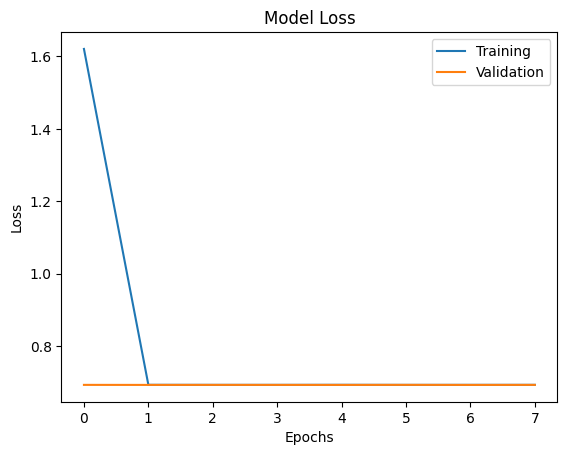

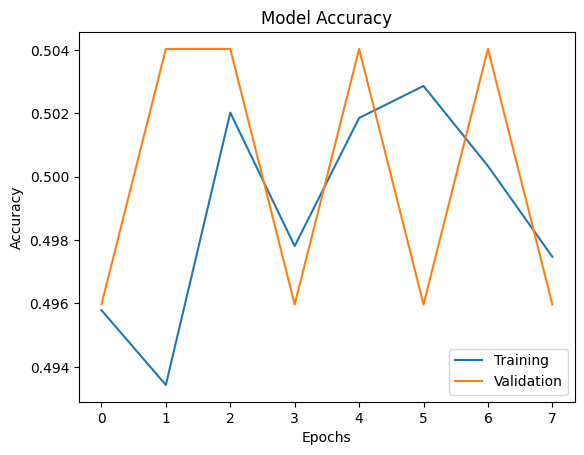

In [21]:
plt.figure()

plt.plot(history.history["loss"], label="Training")
plt.plot(history.history["val_loss"], label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc=0)
plt.title("Model Loss")
plt.show()

plt.figure()
plt.plot(history.history["accuracy"], label="Training")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc=0)
plt.title("Model Accuracy")


plt.show()


2/2 [==============================] - 0s 7ms/step


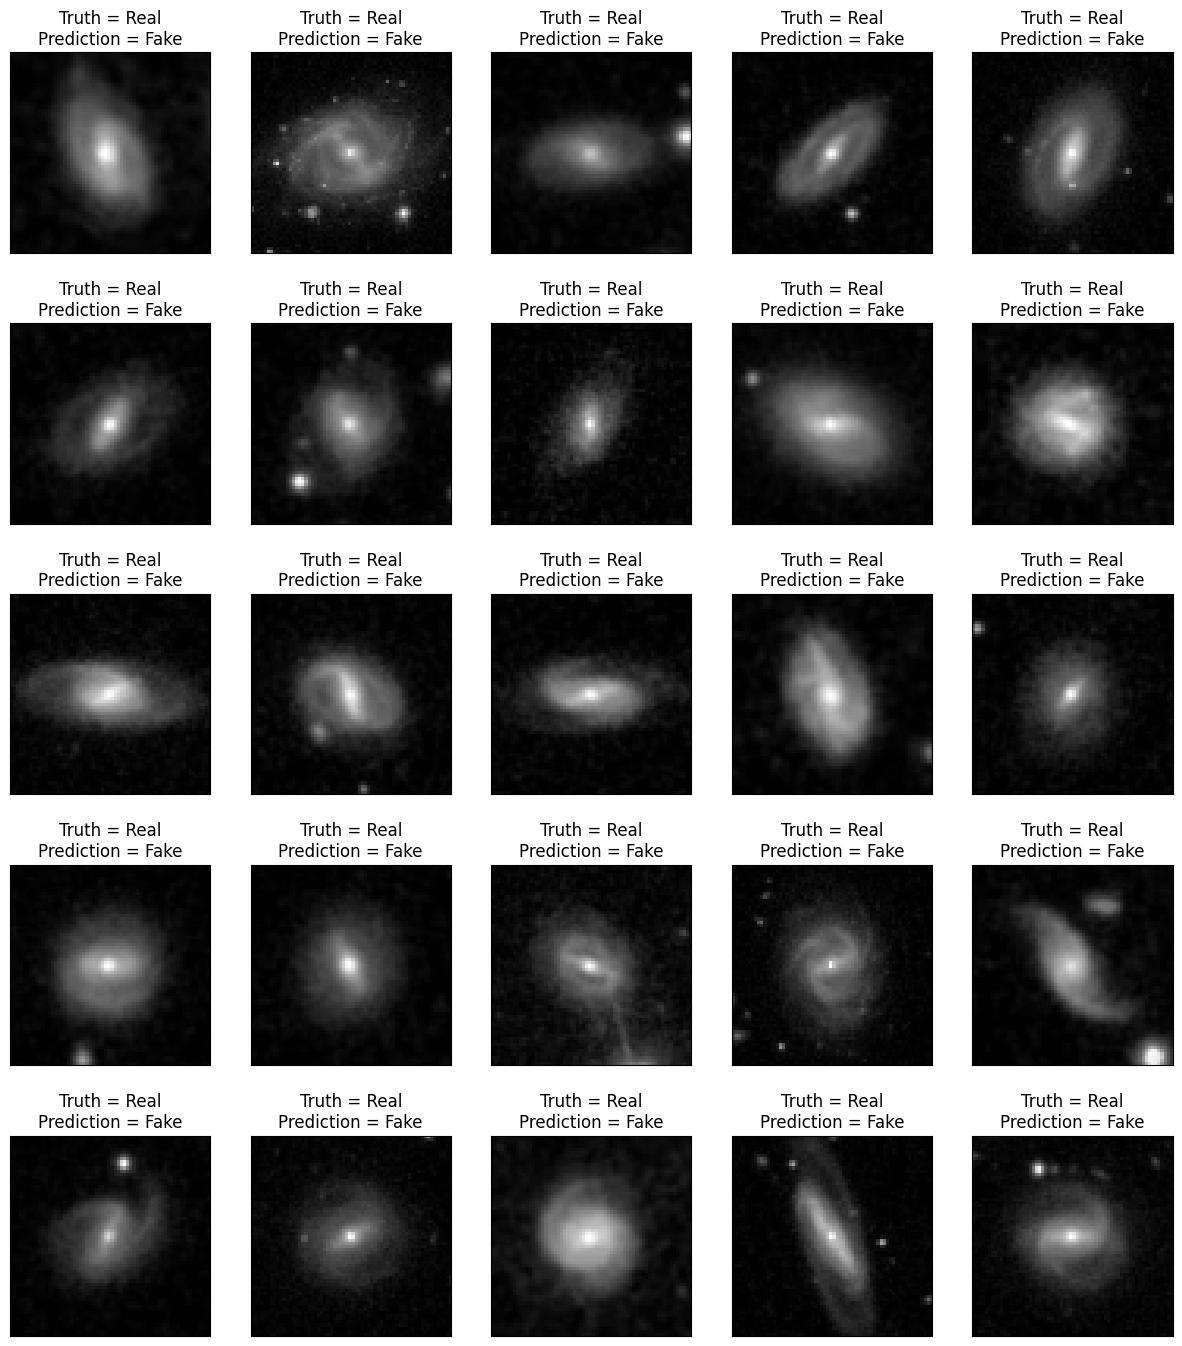

In [28]:
class_names = list(val_gen.class_indices.keys())
x_val, y_val = next(val_gen)
# y_pred = model.predict(x_val)
# threshold = 0.5
# y_pred_label = np.where(y_pred >= threshold, 1, 0)



# f, ax = plt.subplots(5, 5, figsize=(15, 17))
# ax = ax.flatten()

# for i in range(25):
#     ax[i].imshow(x_val[i, :, :, 0], cmap='gray')
#     ax[i].set_title(f'Truth = {class_names[int(y_val[i])]}\nPrediction = {class_names[int(y_pred_label[i])]}')
#     ax[i].set_xticks([])
#     ax[i].set_yticks([])

# plt.show()

2/2 [==============================] - 0s 6ms/step


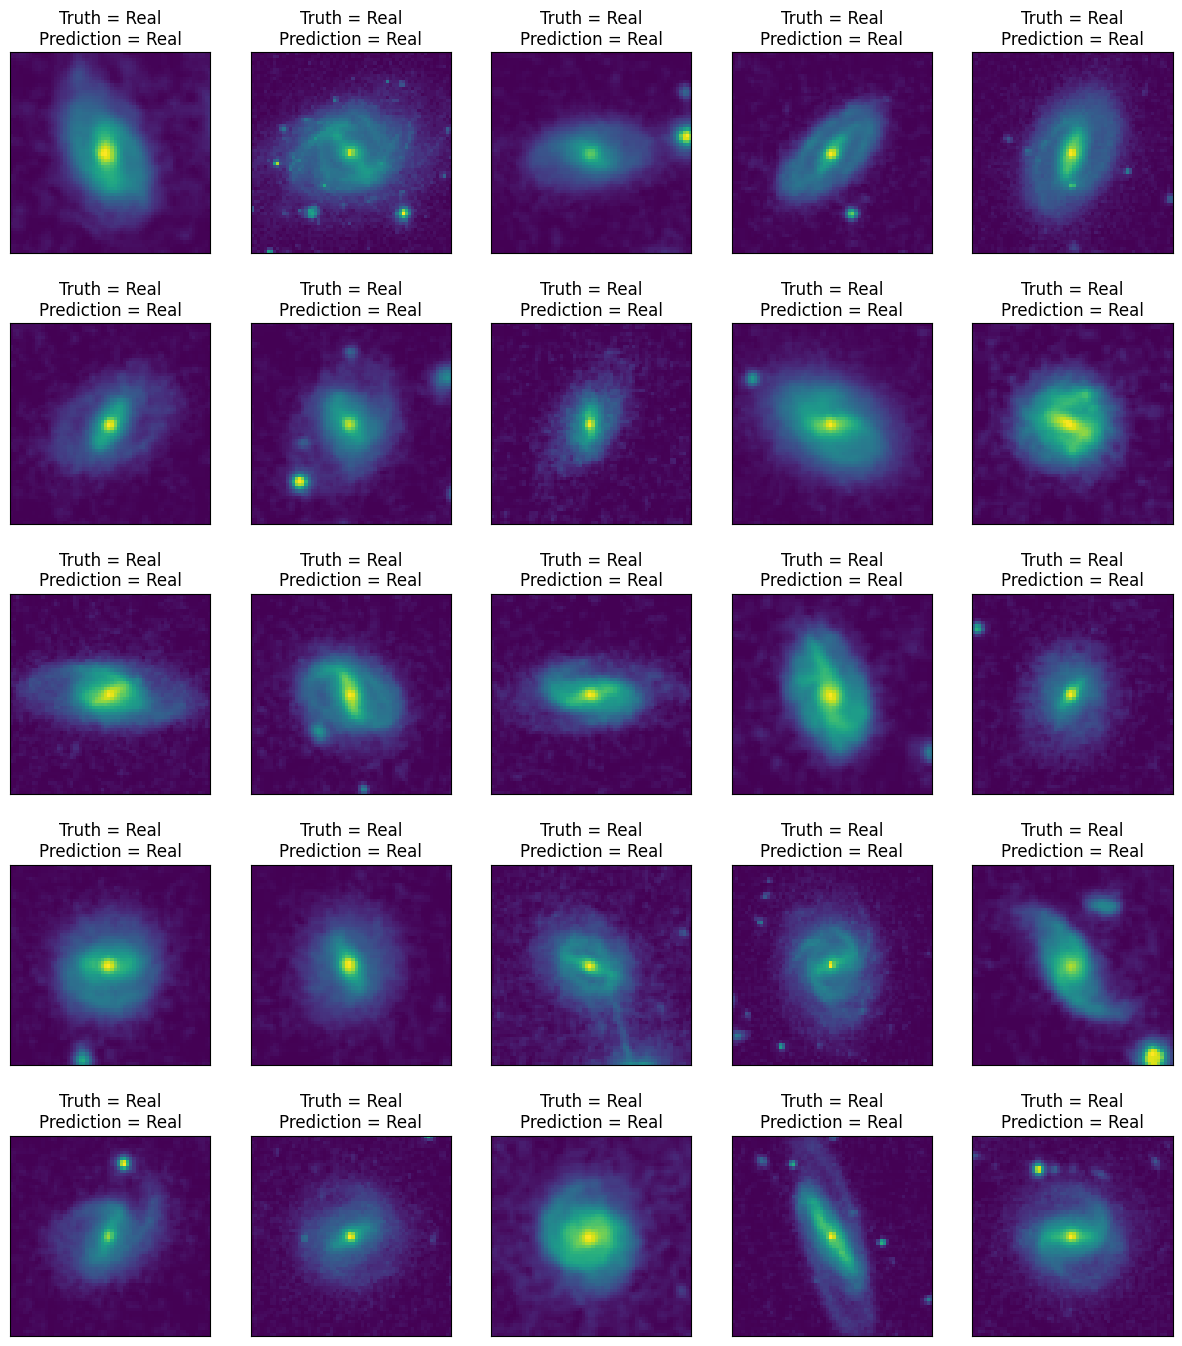

In [33]:
y_pred = model.predict(x_val)
y_pred_label = np.argmax(y_pred, axis=1)

f, ax = plt.subplots(5,5, figsize=(15, 17))
ax = ax.flatten()

for i in range(25):
    ax[i].imshow(x_val[i,:,:,0])
    ax[i].set_title(f'Truth = {class_names[int(y_val[i])]}\nPrediction = {class_names[int(y_pred_label[i])]}')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()